In [208]:
# import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from datetime import datetime
import quandl
import ta
import seaborn as sns
%matplotlib inline

In [2]:
# import data
CMD_ES1 = quandl.get("CHRIS/CME_ES1", authtoken="yZBffFw6dH7FeK5sdXq9")

In [3]:
# view revision 0.0
CMD_ES1.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1997-09-09,934.0,942.0,933.0,934.0,NaN,934.0,7034.0,1109.0
1997-09-10,934.0,935.0,915.0,915.0,NaN,915.0,11387.0,2325.0
1997-09-11,916.0,918.0,900.0,908.0,NaN,908.0,2523.0,2549.0
1997-09-12,908.0,926.0,904.0,924.0,NaN,924.0,928.0,2163.0
1997-09-15,925.0,930.0,920.0,922.0,NaN,922.0,208.0,2107.0


In [4]:
# calculating moving average
CMD_ES1['SMA10'] = CMD_ES1['Settle'].rolling(window=10).mean()
CMD_ES1['SMA50'] = CMD_ES1['Settle'].rolling(window=50).mean()

In [5]:
# view revision 0.1
CMD_ES1.head(12)

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SMA10,SMA50
Date,,,,,,,,,,
1997-09-09,934.00,942.00,933.00,934.00,NaN,934.00,7034.0,1109.0,NaN,NaN
1997-09-10,934.00,935.00,915.00,915.00,NaN,915.00,11387.0,2325.0,NaN,NaN
1997-09-11,916.00,918.00,900.00,908.00,NaN,908.00,2523.0,2549.0,NaN,NaN
1997-09-12,908.00,926.00,904.00,924.00,NaN,924.00,928.0,2163.0,NaN,NaN
1997-09-15,925.00,930.00,920.00,922.00,NaN,922.00,208.0,2107.0,NaN,NaN
1997-09-16,923.00,950.00,921.00,947.00,NaN,947.00,354.0,2264.0,NaN,NaN
1997-09-17,944.00,952.00,942.00,946.00,NaN,946.00,345.0,2290.0,NaN,NaN
1997-09-18,946.00,960.00,945.00,948.00,NaN,948.00,687.0,2547.0,NaN,NaN
1997-09-19,957.75,963.25,953.00,961.00,NaN,961.00,22081.0,5836.0,NaN,NaN


In [42]:
# intialize bollinger bands indicator
CMD_ES1['BB_bbh'] = ta.volatility.bollinger_hband(close=CMD_ES1['Settle'], n=10, ndev=2)
CMD_ES1['BB_bbl'] = ta.volatility.bollinger_lband(close=CMD_ES1['Settle'], n=10, ndev=2)
CMD_ES1['BB_bbmavg5'] = ta.volatility.bollinger_mavg(close=CMD_ES1['Settle'], n=5)
CMD_ES1['BB_bbmavg10'] = ta.volatility.bollinger_mavg(close=CMD_ES1['Settle'], n=10)
CMD_ES1['BB_bbmavg20'] = ta.volatility.bollinger_mavg(close=CMD_ES1['Settle'], n=20)
CMD_ES1['BB_bbmavg50'] = ta.volatility.bollinger_mavg(close=CMD_ES1['Settle'], n=50)

In [43]:
# view revision 0.2
CMD_ES1.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SMA10,SMA50,BB_bbh,BB_bbl,BB_bbmavg,BB_bbmavg5,BB_bbmavg10,BB_bbmavg20,BB_bbmavg50
Date,,,,,,,,,,,,,,,,,
1997-09-09,934.0,942.0,933.0,934.0,NaN,934.0,7034.0,1109.0,NaN,NaN,NaN,NaN,934.00,934.00,934.00,934.00,934.00
1997-09-10,934.0,935.0,915.0,915.0,NaN,915.0,11387.0,2325.0,NaN,NaN,951.370058,897.629942,924.50,924.50,924.50,924.50,924.50
1997-09-11,916.0,918.0,900.0,908.0,NaN,908.0,2523.0,2549.0,NaN,NaN,945.907248,892.092752,919.00,919.00,919.00,919.00,919.00
1997-09-12,908.0,926.0,904.0,924.0,NaN,924.0,928.0,2163.0,NaN,NaN,942.781459,897.718541,920.25,920.25,920.25,920.25,920.25
1997-09-15,925.0,930.0,920.0,922.0,NaN,922.0,208.0,2107.0,NaN,NaN,940.175495,901.024505,920.60,920.60,920.60,920.60,920.60


In [133]:
# find frequency of cross-over
count = 0
df_sub = CMD_ES1[-365:]
mavg_fast = 'Settle'
mavg_slow = 'BB_bbmavg5'
length = len(df_sub)-1

signals = []

for i in range(0, length):
    if (df_sub[mavg_fast][i] < df_sub[mavg_slow][i] and 
        df_sub[mavg_fast][i+1] > df_sub[mavg_slow][i+1]):
        signals.append('buy')
        count = count + 1
    elif (df_sub[mavg_fast][i] > df_sub[mavg_slow][i] and
        df_sub[mavg_fast][i+1] < df_sub[mavg_slow][i+1]):
        signals.append('sell')
        count = count + 1
    else:
        signals.append('-')
        
signals.append('-')
print('The count is:', count)
signals_df = pd.DataFrame(signals, columns=['signals'])
signals_df.index = df_sub.index
signals_df.head(20)

The count is: 87


,signals
Date,
2018-09-11,-
2018-09-12,-
2018-09-13,-
2018-09-14,sell
2018-09-17,buy
2018-09-18,-
2018-09-19,-
2018-09-20,-
2018-09-21,-


In [134]:
# add signals to subset of main df
df_sub['signals'] = pd.Series(signals_df['signals'])

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [137]:
# view revision 0.3
df_sub.head(10)

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SMA10,SMA50,BB_bbh,BB_bbl,BB_bbmavg,BB_bbmavg5,BB_bbmavg10,BB_bbmavg20,BB_bbmavg50,signals
Date,,,,,,,,,,,,,,,,,,
2018-09-11,2879.75,2893.00,2867.25,2890.00,9.50,2889.75,1245406.0,2714490.0,2892.825,2834.965,2918.001102,2867.648898,2834.965,2882.40,2892.825,2875.1125,2834.965,-
2018-09-12,2890.00,2895.25,2879.50,2887.00,1.25,2888.50,1548446.0,2690666.0,2891.750,2838.190,2916.623011,2866.876989,2838.190,2882.45,2891.750,2877.4875,2838.190,-
2018-09-13,2887.00,2907.00,2884.75,2905.00,16.75,2905.25,1612993.0,2589244.0,2890.800,2842.030,2912.260299,2869.339701,2842.030,2887.70,2890.800,2881.6875,2842.030,-
2018-09-14,2904.75,2912.25,2896.75,2906.00,1.00,2906.25,1171968.0,2302715.0,2891.225,2845.385,2913.809963,2868.640037,2845.385,2894.00,2891.225,2884.7625,2845.385,sell
2018-09-17,2903.50,2906.25,2887.25,2890.50,15.25,2891.00,1135552.0,1918404.0,2890.125,2847.945,2911.411733,2868.838267,2847.945,2896.15,2890.125,2886.7000,2847.945,buy
2018-09-18,2890.50,2912.50,2878.50,2907.75,15.50,2906.50,960957.0,1401787.0,2890.950,2850.325,2914.186466,2867.713534,2850.325,2899.50,2890.950,2889.1000,2850.325,-
2018-09-19,2907.75,2913.75,2900.75,2911.50,3.50,2910.00,548972.0,967172.0,2893.125,2852.590,2919.143423,2867.106577,2852.590,2903.80,2893.125,2891.5125,2852.590,-
2018-09-20,2911.25,2935.75,2908.25,2935.25,24.00,2934.00,349971.0,725806.0,2898.625,2855.790,2933.214056,2864.035944,2855.790,2909.55,2898.625,2895.1500,2855.790,-
2018-09-21,2934.75,2944.00,2932.25,2943.00,NaN,2940.45,38480.0,633921.0,2905.195,2858.629,2944.293578,2866.096422,2858.629,2916.39,2905.195,2899.2725,2858.629,-


In [156]:
# calculate the differnce between the settle points
points = [b-a for a, b in zip(df_sub['Settle'][:-1], df_sub['Settle'][1:])]
points.append(0)
pt_changes_df = pd.DataFrame(points, columns=['point_changes'])
pt_changes_df.index = df_sub.index
pt_changes_df.head(10)

,point_changes
Date,
2018-09-11,-1.25
2018-09-12,16.75
2018-09-13,1.00
2018-09-14,-15.25
2018-09-17,15.50
2018-09-18,3.50
2018-09-19,24.00
2018-09-20,6.45
2018-09-21,-14.95


In [157]:
# add point changes to subset of main df
df_sub['point_changes'] = pt_changes_df['point_changes']

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [158]:
# view revision 0.4
df_sub.head(10)

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SMA10,SMA50,BB_bbh,BB_bbl,BB_bbmavg,BB_bbmavg5,BB_bbmavg10,BB_bbmavg20,BB_bbmavg50,signals,point_changes
Date,,,,,,,,,,,,,,,,,,,
2018-09-11,2879.75,2893.00,2867.25,2890.00,9.50,2889.75,1245406.0,2714490.0,2892.825,2834.965,2918.001102,2867.648898,2834.965,2882.40,2892.825,2875.1125,2834.965,-,-1.25
2018-09-12,2890.00,2895.25,2879.50,2887.00,1.25,2888.50,1548446.0,2690666.0,2891.750,2838.190,2916.623011,2866.876989,2838.190,2882.45,2891.750,2877.4875,2838.190,-,16.75
2018-09-13,2887.00,2907.00,2884.75,2905.00,16.75,2905.25,1612993.0,2589244.0,2890.800,2842.030,2912.260299,2869.339701,2842.030,2887.70,2890.800,2881.6875,2842.030,-,1.00
2018-09-14,2904.75,2912.25,2896.75,2906.00,1.00,2906.25,1171968.0,2302715.0,2891.225,2845.385,2913.809963,2868.640037,2845.385,2894.00,2891.225,2884.7625,2845.385,sell,-15.25
2018-09-17,2903.50,2906.25,2887.25,2890.50,15.25,2891.00,1135552.0,1918404.0,2890.125,2847.945,2911.411733,2868.838267,2847.945,2896.15,2890.125,2886.7000,2847.945,buy,15.50
2018-09-18,2890.50,2912.50,2878.50,2907.75,15.50,2906.50,960957.0,1401787.0,2890.950,2850.325,2914.186466,2867.713534,2850.325,2899.50,2890.950,2889.1000,2850.325,-,3.50
2018-09-19,2907.75,2913.75,2900.75,2911.50,3.50,2910.00,548972.0,967172.0,2893.125,2852.590,2919.143423,2867.106577,2852.590,2903.80,2893.125,2891.5125,2852.590,-,24.00
2018-09-20,2911.25,2935.75,2908.25,2935.25,24.00,2934.00,349971.0,725806.0,2898.625,2855.790,2933.214056,2864.035944,2855.790,2909.55,2898.625,2895.1500,2855.790,-,6.45
2018-09-21,2934.75,2944.00,2932.25,2943.00,NaN,2940.45,38480.0,633921.0,2905.195,2858.629,2944.293578,2866.096422,2858.629,2916.39,2905.195,2899.2725,2858.629,-,-14.95


In [161]:
# calculate sign changes for equity curve
length = len(df_sub)
sign = 1
signs = []
for i in range(0, length):
    if df_sub['signals'][i] == 'sell':
        sign = -1
    if df_sub['signals'][i] == 'buy':
        sign = 1
    signs.append(sign)
signs_df = pd.DataFrame(signs, columns=['signs'])
signs_df.index = df_sub.index
signs_df.head(10)

,signs
Date,
2018-09-11,1
2018-09-12,1
2018-09-13,1
2018-09-14,-1
2018-09-17,1
2018-09-18,1
2018-09-19,1
2018-09-20,1
2018-09-21,1


In [162]:
# add signs to subset of main df
df_sub['signs'] = signs_df['signs']

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [164]:
# view revision 0.5
df_sub.head(5)

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SMA10,SMA50,BB_bbh,BB_bbl,BB_bbmavg,BB_bbmavg5,BB_bbmavg10,BB_bbmavg20,BB_bbmavg50,signals,point_changes,signs
Date,,,,,,,,,,,,,,,,,,,,
2018-09-11,2879.75,2893.00,2867.25,2890.0,9.50,2889.75,1245406.0,2714490.0,2892.825,2834.965,2918.001102,2867.648898,2834.965,2882.40,2892.825,2875.1125,2834.965,-,-1.25,1
2018-09-12,2890.00,2895.25,2879.50,2887.0,1.25,2888.50,1548446.0,2690666.0,2891.750,2838.190,2916.623011,2866.876989,2838.190,2882.45,2891.750,2877.4875,2838.190,-,16.75,1
2018-09-13,2887.00,2907.00,2884.75,2905.0,16.75,2905.25,1612993.0,2589244.0,2890.800,2842.030,2912.260299,2869.339701,2842.030,2887.70,2890.800,2881.6875,2842.030,-,1.00,1
2018-09-14,2904.75,2912.25,2896.75,2906.0,1.00,2906.25,1171968.0,2302715.0,2891.225,2845.385,2913.809963,2868.640037,2845.385,2894.00,2891.225,2884.7625,2845.385,sell,-15.25,-1
2018-09-17,2903.50,2906.25,2887.25,2890.5,15.25,2891.00,1135552.0,1918404.0,2890.125,2847.945,2911.411733,2868.838267,2847.945,2896.15,2890.125,2886.7000,2847.945,buy,15.50,1


In [186]:
# calculate settle w signal 
pt_chng_signals_df = pd.DataFrame(signs_df['signs'] * pt_changes_df['point_changes'], columns=['pt_chng_signals'])
pt_chng_signals_df.head()

,pt_chng_signals
Date,
2018-09-11,-1.25
2018-09-12,16.75
2018-09-13,1.00
2018-09-14,15.25
2018-09-17,15.50


In [187]:
# add to subset of main df
df_sub['pt_chng_signals'] = pt_chng_signals_df['pt_chng_signals']

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [188]:
# view revision 0.6
df_sub.head(5)

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SMA10,SMA50,...,BB_bbmavg,BB_bbmavg5,BB_bbmavg10,BB_bbmavg20,BB_bbmavg50,signals,point_changes,signs,settle_w_signals,pt_chng_signals
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,2879.75,2893.00,2867.25,2890.0,9.50,2889.75,1245406.0,2714490.0,2892.825,2834.965,...,2834.965,2882.40,2892.825,2875.1125,2834.965,-,-1.25,1,2889.75,-1.25
2018-09-12,2890.00,2895.25,2879.50,2887.0,1.25,2888.50,1548446.0,2690666.0,2891.750,2838.190,...,2838.190,2882.45,2891.750,2877.4875,2838.190,-,16.75,1,2888.50,16.75
2018-09-13,2887.00,2907.00,2884.75,2905.0,16.75,2905.25,1612993.0,2589244.0,2890.800,2842.030,...,2842.030,2887.70,2890.800,2881.6875,2842.030,-,1.00,1,2905.25,1.00
2018-09-14,2904.75,2912.25,2896.75,2906.0,1.00,2906.25,1171968.0,2302715.0,2891.225,2845.385,...,2845.385,2894.00,2891.225,2884.7625,2845.385,sell,-15.25,-1,-2906.25,15.25
2018-09-17,2903.50,2906.25,2887.25,2890.5,15.25,2891.00,1135552.0,1918404.0,2890.125,2847.945,...,2847.945,2896.15,2890.125,2886.7000,2847.945,buy,15.50,1,2891.00,15.50


In [202]:
# convert the pt change signals into dollar values
index_pts = 0.25
dollar_amt = 12.50
conversion_rate = dollar_amt / index_pts
converted_to_dollars = df_sub['pt_chng_signals'] * conversion_rate
converted_to_dollars.head()

Date
2018-09-11    -62.5
2018-09-12    837.5
2018-09-13     50.0
2018-09-14    762.5
2018-09-17    775.0
Name: pt_chng_signals, dtype: float64

In [203]:
# add to subset of main df
df_sub['dollar_chng_signals'] = converted_to_dollars

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [204]:
# view revision 0.7
df_sub.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SMA10,SMA50,...,BB_bbmavg5,BB_bbmavg10,BB_bbmavg20,BB_bbmavg50,signals,point_changes,signs,settle_w_signals,pt_chng_signals,dollar_chng_signals
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,2879.75,2893.00,2867.25,2890.0,9.50,2889.75,1245406.0,2714490.0,2892.825,2834.965,...,2882.40,2892.825,2875.1125,2834.965,-,-1.25,1,2889.75,-1.25,-62.5
2018-09-12,2890.00,2895.25,2879.50,2887.0,1.25,2888.50,1548446.0,2690666.0,2891.750,2838.190,...,2882.45,2891.750,2877.4875,2838.190,-,16.75,1,2888.50,16.75,837.5
2018-09-13,2887.00,2907.00,2884.75,2905.0,16.75,2905.25,1612993.0,2589244.0,2890.800,2842.030,...,2887.70,2890.800,2881.6875,2842.030,-,1.00,1,2905.25,1.00,50.0
2018-09-14,2904.75,2912.25,2896.75,2906.0,1.00,2906.25,1171968.0,2302715.0,2891.225,2845.385,...,2894.00,2891.225,2884.7625,2845.385,sell,-15.25,-1,-2906.25,15.25,762.5
2018-09-17,2903.50,2906.25,2887.25,2890.5,15.25,2891.00,1135552.0,1918404.0,2890.125,2847.945,...,2896.15,2890.125,2886.7000,2847.945,buy,15.50,1,2891.00,15.50,775.0


In [205]:
# calculate equity curve
curr_equity = 5000
equity = []
for chng in df_sub['dollar_chng_signals']:
    curr_equity = curr_equity + chng
    equity.append(curr_equity)
    
equity_df = pd.DataFrame(equity, columns=['equity'])
equity_df.index = df_sub.index
equity_df.head()

,equity
Date,
2018-09-11,4937.5
2018-09-12,5775.0
2018-09-13,5825.0
2018-09-14,6587.5
2018-09-17,7362.5


In [206]:
# add equity to subset of main df
df_sub['equity'] = equity_df['equity']

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [207]:
# view revision 0.8
df_sub.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest,SMA10,SMA50,...,BB_bbmavg10,BB_bbmavg20,BB_bbmavg50,signals,point_changes,signs,settle_w_signals,pt_chng_signals,dollar_chng_signals,equity
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,2879.75,2893.00,2867.25,2890.0,9.50,2889.75,1245406.0,2714490.0,2892.825,2834.965,...,2892.825,2875.1125,2834.965,-,-1.25,1,2889.75,-1.25,-62.5,4937.5
2018-09-12,2890.00,2895.25,2879.50,2887.0,1.25,2888.50,1548446.0,2690666.0,2891.750,2838.190,...,2891.750,2877.4875,2838.190,-,16.75,1,2888.50,16.75,837.5,5775.0
2018-09-13,2887.00,2907.00,2884.75,2905.0,16.75,2905.25,1612993.0,2589244.0,2890.800,2842.030,...,2890.800,2881.6875,2842.030,-,1.00,1,2905.25,1.00,50.0,5825.0
2018-09-14,2904.75,2912.25,2896.75,2906.0,1.00,2906.25,1171968.0,2302715.0,2891.225,2845.385,...,2891.225,2884.7625,2845.385,sell,-15.25,-1,-2906.25,15.25,762.5,6587.5
2018-09-17,2903.50,2906.25,2887.25,2890.5,15.25,2891.00,1135552.0,1918404.0,2890.125,2847.945,...,2890.125,2886.7000,2847.945,buy,15.50,1,2891.00,15.50,775.0,7362.5


In [213]:
# prep equity df for plotting
equity_plot_data = pd.DataFrame(columns=['date', 'equity'])
equity_plot_data['date'] = df_sub.index
equity_plot_data['equity'] = list(df_sub['equity'])
equity_plot_data.head()

,date,equity
0,2018-09-11,4937.5
1,2018-09-12,5775.0
2,2018-09-13,5825.0
3,2018-09-14,6587.5
4,2018-09-17,7362.5


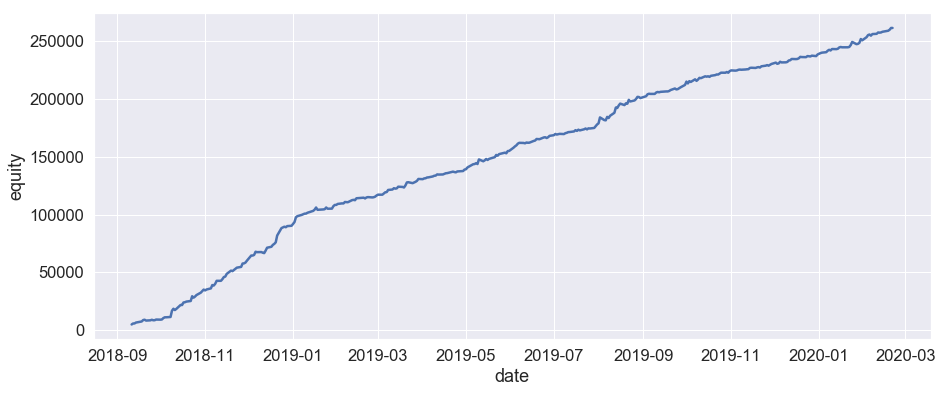

In [219]:
# plot equity 
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15, 6))

sns.lineplot(x="date", y="equity", data=equity_plot_data)